## Document Analysis: Computational Methods - Summer Term 2025
### Lectures: Jun.-Prof. Dr. Andreas Spitz
### Tutorials: Julian Schelb

### Authors: Anna Werner, Buket Sak, Zeyuan Yu

# Exercise 06

### You will learn about:

- Word Embeddings (word2vec)

---

## Task 1 - Word2Vec:

### Part 1:
Explain the difference between the continuous bag of words (CBOW) and Skip-Gram versions of word2vec.

CBOW: given surrounding words are used to predict the center word.

Skip-Gram: A center-word is predicted by its surrounding words.

Both initlialized as one-hot encoded vectors. Projected to a more dense vector through shared dense weights. Each input word vector is multiplied with this matrix. From this dense vector respresentation -> expand back to the original dimension / Output.

" Generally, the skip-gram method can have a better performance compared with CBOW method, for it can capture two semantics for a single word. For instance, it will have two vector representations for Apple, one for the company and another for the fruit. For more details about the word2vec algorithm, please check here." [source](https://medium.com/data-science/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92)

---

### Part 2: 
Given the sentence "You shall know a word by the company it keeps" and a sliding window size of l=5 (two to the left, two to the right), generate a list of all positive training data (input and output) that

a) CBOW creates for the word "company".

b) Skip-Gram creates for the word "word".

a) 
| Input    | Output  |
| ---------| ------- |
| know     | word    |
| a        | word    |
| by       | word    |
| the      | word    |

b)
| Input    | Output  |
| -------- | ------- |
| You      | shall   |
| You      | know    |
| shall    | You     |
| shall    | know    |
| shall    | a       |
| know     | You     |
| know     | shall   |
| know     | a       |
| know     | word    |
| a        | shall   |
| a        | know    |
| a        | word    |
| a        | by      |
| word     | know    |
| word     | a       |
| word     | by      |
| word     | the     |
... etc.

---

## Task 2 - Similarity:

### Part 1:
Given The following 5-dimensional vector embeddings for three words, manually compute cosine similarities to determine whether a boat is more similar to an apple or to an orange.

apple = [1,5,3,3,2]

orange = [2,5,2,4,2]

boat = [6,1,8,4,2]

*boat and apple*
$$
\cos(\text{boat}, \text{apple}) = \frac{\vec{\text{boat}} \cdot \vec{\text{apple}}}{\|\vec{\text{boat}}\| \cdot \|\vec{\text{apple}}\|}
$$

$$
= \frac{[6,1,8,4,2] \cdot [1,5,3,3,2]}{\|[6,1,8,4,2]\| \cdot \|[1,5,3,3,2]\|}
$$

$$
= \frac{[6 \cdot 1+1 \cdot 5+8 \cdot 3+4 \cdot 3+2 \cdot 2]}{\sqrt{6^2 + 1^2+ 8^2+ 4^2+ 2^2} \cdot \sqrt{1^2+5^2+3^2+3^2+2^2}}
$$

$$
= \frac{51}{11 \cdot 4\sqrt{3}}
$$

$$
= \frac{17\sqrt{3}}{44} = 0.6692
$$

*boat and apple*
$$
\cos(\text{boat}, \text{orange}) = \frac{\vec{\text{boat}} \cdot \vec{\text{orange}}}{\|\vec{\text{boat}}\| \cdot \|\vec{\text{orange}}\|}
$$

$$
= \frac{[6,1,8,4,2] \cdot [2,5,2,4,2]}{\|[6,1,8,4,2]\| \cdot \|[2,5,2,4,2]\|}
$$

$$
= \frac{53}{11 \cdot \sqrt{53}} = 0.6618
$$

---

#### Part 2:

What are the implications of being able to compute arbitrary pairwise word similarities as in the example above?

they can be embedded in a vector space based on their similarities/put in relation to each other and thus used to

It does not allow nuanced comparison

---

#### Part 3:

Using a pre-trained word2vec model from gensim package, investigate the claim that embeddings encode semantic relations via compositional semantics, such als "king - man + woman = queen". For each of the following examples, use the model to generate the three input vectors, compute the target vector, and retrieve the 10 most similar words by cosine similarity. Discuss your findings.

Examples:

- king - man + woman
- France - Paris + Tokyo
- sister - brother + grandson
- bigger - big + cold
- scientist - Einstein + Picasso

In [ ]:
# load pre-trained word2vec
# you first need to download the bin file of the model, do not submit this file!!! since it will be larger than 1GB
from gensim.models import KeyedVectors

model_path = 'GoogleNews-vectors-negative300.bin'  # Example path
model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [9]:
# TODO - ADD YOUR CODE HERE
king_vec = model['king']
print(king_vec.shape)

# computes cosine similarity
res1 = model['king'] - model['man'] + model['woman']
res2 = model['France'] - model['Paris'] + model['Tokyo']
res3 = model['sister'] - model['brother'] + model['grandson']
res4 = model['bigger'] - model['big'] + model['cold']
res5 = model['scientist'] - model['Einstein'] + model['Picasso']

res1

(300,)


TypeError: KeyedVectors.cosine_similarities() missing 1 required positional argument: 'vectors_all'

In [11]:
print("1. king - man + woman:")
res1 = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=10)
for word, score in res1:
    print(f"{word:20} {score:.4f}")

print("\n2. France - Paris + Tokyo:")
res2 = model.most_similar(positive=['France', 'Tokyo'], negative=['Paris'], topn=10)
for word, score in res2:
    print(f"{word:20} {score:.4f}")

print("\n3. sister - brother + grandson:")
res3 = model.most_similar(positive=['sister', 'grandson'], negative=['brother'], topn=10)
for word, score in res3:
    print(f"{word:20} {score:.4f}")

print("\n4. bigger - big + cold:")
res4 = model.most_similar(positive=['bigger', 'cold'], negative=['big'], topn=10)
for word, score in res4:
    print(f"{word:20} {score:.4f}")

print("\n5. scientist - Einstein + Picasso:")
res5 = model.most_similar(positive=['scientist', 'Picasso'], negative=['Einstein'], topn=10)
for word, score in res5:
    print(f"{word:20} {score:.4f}")

1. king - man + woman:
queen                0.7118
monarch              0.6190
princess             0.5902
crown_prince         0.5499
prince               0.5377
kings                0.5237
Queen_Consort        0.5236
queens               0.5181
sultan               0.5099
monarchy             0.5087

2. France - Paris + Tokyo:
Japan                0.8168
Japanese             0.6481
South_Korea          0.6142
Japans               0.6117
Shizuoka             0.5742
Aomori_Prefecture    0.5598
northernmost_prefecture 0.5525
Kyushu               0.5514
captain_Makoto_Hasebe 0.5508
Shimane              0.5497

3. sister - brother + grandson:
granddaughter        0.8571
niece                0.7652
daughter             0.7484
granddaughters       0.7268
grandmother          0.7174
grandaughter         0.7067
mother               0.6843
aunt                 0.6822
grandchild           0.6611
eldest_daughter      0.6485

4. bigger - big + cold:
colder               0.6777
warmer             

<font color='ff000000'>\# TEXT SUBMISSION ANSWER HERE (Double click to edit) </font>

## Task 3 - Embedding Visualization:

### Part 1:
Your task is to calculate the pair-wise similarities between the first 500 critics of the 'rottentomatoes' dataset from the earlier assignment (this time work on single critics, i.e., sentences).
Calculate the pairwise similarity between their average word2vec embedding vectors and visualize the results.

[nltk_data] Downloading package punkt to /Users/anna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


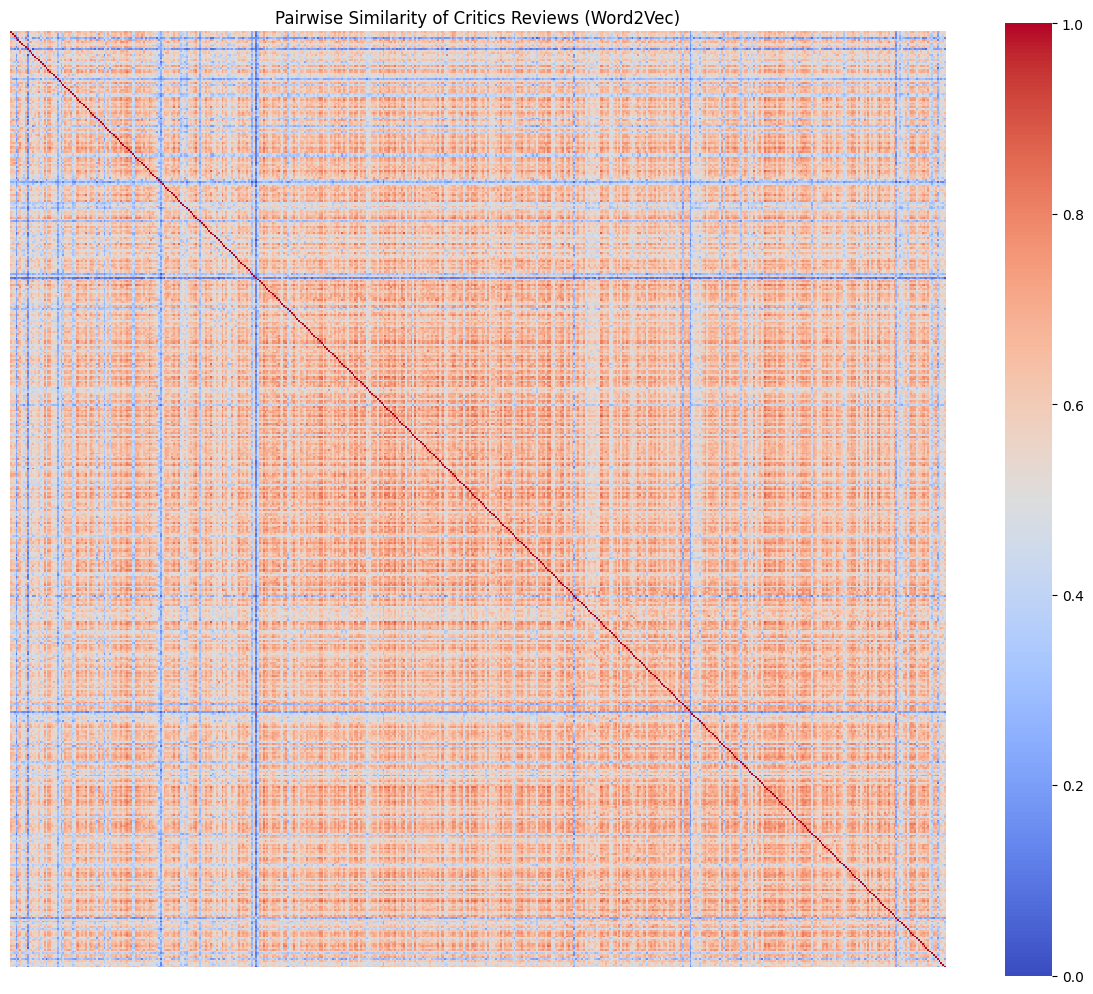


Most similar pair:
Similarity: 0.4585
Review 1: It's a hollow shell of a film, rife with plot twists that go nowhere....
Review 2: ...challenging, joyous, heartbreaking and quite funny......

Most dissimilar pair:
Similarity: 0.1918
Review 1: Superb and unrivalled....
Review 2: While the 2011 version of the film doesn't suck, it isn't as good as the original ......


In [20]:
# TODO - ADD YOUR CODE HERE
import json
import numpy as np
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Load Rotten Tomatoes data
with open('data/rottentomatoes.json', 'r') as f:
    rt_dat = json.load(f)

# Extract first 500 critic reviews
critics = []
if isinstance(rt_dat, list):
    for movie in rt_dat:
        for critic_review in movie['_critics'].values():
            critics.append(critic_review)
            if len(critics) >= 500:
                break
        if len(critics) >= 500:
            break

def get_sentence_vector(sentence):
    """Convert sentence to average word vector"""
    words = [w.lower() for w in word_tokenize(sentence) if w.isalpha()]
    vectors = []
    for word in words:
        if word in model:
            vectors.append(model[word])
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Create matrix of critic embeddings
embedding_matrix = np.array([get_sentence_vector(review) for review in critics])

# Calculate pairwise cosine similarities
similarity_matrix = cosine_similarity(embedding_matrix)

# Visualization
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(similarity_matrix, 
            cmap='coolwarm',
            vmin=0, 
            vmax=1,
            square=True,
            xticklabels=False,
            yticklabels=False)
plt.title('Pairwise Similarity of Critics Reviews (Word2Vec)')
plt.tight_layout()
plt.savefig('critics_similarity.png')
plt.show()

# Additional analysis: Print most similar/dissimilar pairs
flat_sim = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]
max_idx = np.argmax(flat_sim)
min_idx = np.argmin(flat_sim)

# Get indices of most similar pair
n = len(similarity_matrix)
row = max_idx // n
col = max_idx % n
print("\nMost similar pair:")
print(f"Similarity: {similarity_matrix[row, col]:.4f}")
print(f"Review 1: {critics[row][:100]}...")
print(f"Review 2: {critics[col][:100]}...")

# Get indices of most dissimilar pair
row = min_idx // n
col = min_idx % n
print("\nMost dissimilar pair:")
print(f"Similarity: {similarity_matrix[row, col]:.4f}")
print(f"Review 1: {critics[row][:100]}...")
print(f"Review 2: {critics[col][:100]}...")

#### Submitting your results:

To submit your results, please:

- save this file, i.e., `ex??_assignment.ipynb`.
- if you reference any external files (e.g., images), please create a zip or rar archieve and put the notebook files and all referenced files in there.
- login to ILIAS and submit the `*.ipynb` or archive for the corresponding assignment.

**Remarks:**
    
- Do not copy any code from the Internet. In case you want to use publicly available code, please, add the reference to the respective code snippet.
- Check your code compiles and executes, even after you have restarted the Kernel.
- Submit your written solutions and the coding exercises within the provided spaces and not otherwise.
- Write the names of your partner and your name in the top section.